In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/# DS Capstone/3 LSTM

/content/drive/MyDrive/# DS Capstone/3 LSTM


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from math import sqrt
from numpy import concatenate

In [4]:
# Load file
file_path = './data_20y.xlsx'
dataset = pd.read_excel(file_path, header=0, index_col=False)
dataset.drop(dataset.tail(1).index,inplace=True)
dataset.drop(dataset.columns[0], axis=1, inplace=True)
values = dataset.values

In [5]:
print(dataset.head())
print(dataset.tail())

   shci_20y    sp_20y   nas_20y   vix_20y    rf_20y  forward_shci_20y
0 -0.009064  0.004716  0.008053 -0.000480 -0.025372          0.007598
1  0.007598  0.015110  0.019388 -0.010557 -0.015260         -0.011346
2 -0.011346  0.003954  0.006949  0.010184  0.012154         -0.011136
3 -0.011136 -0.002404 -0.011294  0.020163  0.006304         -0.005653
4 -0.005653 -0.011977 -0.014409  0.042353 -0.021778          0.005581
      shci_20y    sp_20y   nas_20y   vix_20y    rf_20y  forward_shci_20y
4690 -0.015238 -0.011222 -0.012620  0.076700 -0.005647         -0.012781
4691 -0.012781 -0.007319 -0.006058  0.080950  0.005679         -0.001089
4692 -0.001089  0.008758  0.017136 -0.044433  0.025544          0.003511
4693  0.003511  0.013049  0.021862 -0.062173 -0.001049          0.000857
4694  0.000857  0.000017  0.003217 -0.027298 -0.028871         -0.006095


In [6]:
# Split into train, val, test sets 8:1:1
n_train = int(len(dataset) * 0.8)
train = values[:n_train, :]
val_test = values[n_train:, :]

n_val = int(len(val_test) * 0.5)
val = val_test[:n_val, :]
test = val_test[n_val:, :]

# Print the shapes of train, val, and test sets
print("Dataset shape:", dataset.shape)
print("Train set shape:", train.shape)
print("Validation set shape:", val.shape)
print("Test set shape:", test.shape)

Dataset shape: (4695, 6)
Train set shape: (3756, 6)
Validation set shape: (469, 6)
Test set shape: (470, 6)


In [7]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_val = scaler.transform(val)
scaled_test = scaler.transform(test)

In [8]:
# Split into input and outputs
train_X, train_y = scaled_train[:, :-1], scaled_train[:, -1]
val_X, val_y = scaled_val[:, :-1], scaled_val[:, -1]
test_X, test_y = scaled_test[:, :-1], scaled_test[:, -1]

print("train_X", train_X.shape)
print("train_y", train_y.shape)
print("val_X", val_X.shape)
print("val_y", val_y.shape)
print("test_X", test_X.shape)
print("test_y", test_y.shape)

train_X (3756, 5)
train_y (3756,)
val_X (469, 5)
val_y (469,)
test_X (470, 5)
test_y (470,)


In [9]:
# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

Epoch 1/50
30/30 - 4s - loss: 0.3822 - val_loss: 0.2581 - 4s/epoch - 137ms/step
Epoch 2/50
30/30 - 0s - loss: 0.1292 - val_loss: 0.0653 - 245ms/epoch - 8ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0639 - val_loss: 0.0532 - 242ms/epoch - 8ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0623 - val_loss: 0.0530 - 252ms/epoch - 8ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0622 - val_loss: 0.0528 - 274ms/epoch - 9ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0622 - val_loss: 0.0526 - 241ms/epoch - 8ms/step
Epoch 7/50
30/30 - 0s - loss: 0.0621 - val_loss: 0.0523 - 246ms/epoch - 8ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0620 - val_loss: 0.0521 - 253ms/epoch - 8ms/step
Epoch 9/50
30/30 - 0s - loss: 0.0620 - val_loss: 0.0518 - 262ms/epoch - 9ms/step
Epoch 10/50
30/30 - 0s - loss: 0.0618 - val_loss: 0.0515 - 238ms/epoch - 8ms/step
Epoch 11/50
30/30 - 0s - loss: 0.0617 - val_loss: 0.0513 - 253ms/epoch - 8ms/step
Epoch 12/50
30/30 - 0s - loss: 0.0616 - val_loss: 0.0509 - 249ms/epoch - 8ms/step
Epoch 13/50
30/30 - 0s - l

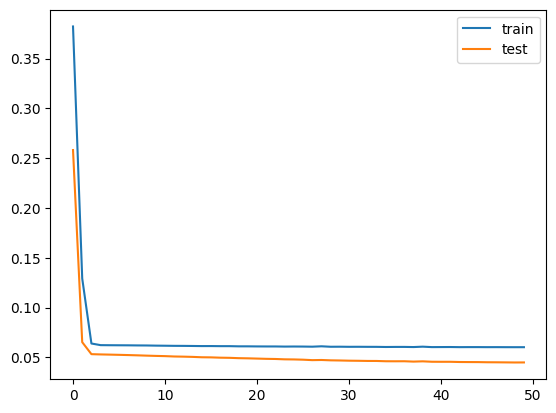

In [10]:
# Model

# def network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=128, validation_data=(val_X, val_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [11]:
# Evaluate the model and calculate Train RMSE
train_yhat = model.predict(train_X)
train_yhat_copies_array = np.repeat(train_yhat, 6, axis=-1)
inv_train_yhat = scaler.inverse_transform(np.reshape(train_yhat_copies_array, (len(train_yhat), 6)))[:, 0]
train_original_copies_array = np.repeat(train_y, 6, axis=-1)
inv_train_y = scaler.inverse_transform(np.reshape(train_original_copies_array, (len(train_y), 6)))[:, 0]
train_rmse = sqrt(mean_squared_error(inv_train_yhat, inv_train_y))
print('Train RMSE: %.4f' % train_rmse)

118/118 [==============================] - 1s 3ms/step
Train RMSE: 0.0158


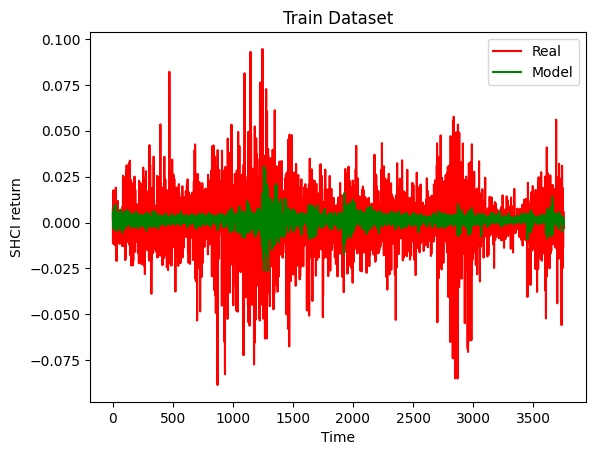

In [12]:
# Plot and check train set
pyplot.plot(inv_train_y, color='red', label='Real')
pyplot.plot(inv_train_yhat, color='green', label='Model')
pyplot.title('Train Dataset')
pyplot.xlabel('Time')
pyplot.ylabel('SHCI return')
pyplot.legend()
pyplot.show()

In [13]:
# Make predictions
yhat = model.predict(test_X)
yhat_copies_array = np.repeat(yhat, 6, axis = -1)
inv_yhat = scaler.inverse_transform(np.reshape(yhat_copies_array, (len(yhat), 6)))[:, 0]
original_copies_array = np.repeat(test_y, 6, axis=-1)
inv_y = scaler.inverse_transform(np.reshape(original_copies_array, (len(test_y), 6)))[:, 0]
rmse = sqrt(mean_squared_error(inv_yhat, inv_y))
print('Test RMSE: %.4f' % rmse)

15/15 [==============================] - 0s 3ms/step
Test RMSE: 0.0098


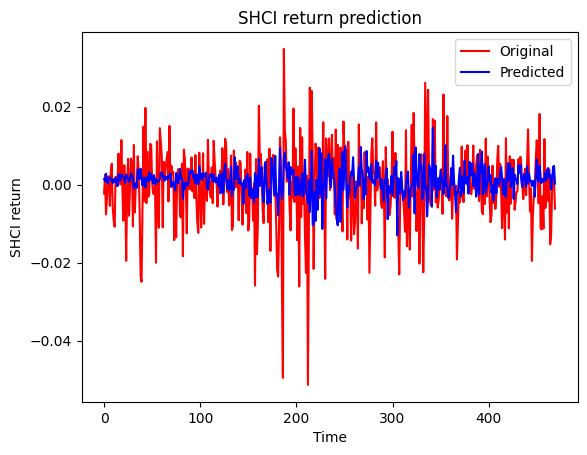

In [14]:
# plot predicted vs actual
pyplot.plot(inv_y, color='red', label='Original')
pyplot.plot(inv_yhat, color='blue', label='Predicted')
pyplot.title('SHCI return prediction')
pyplot.xlabel('Time')
pyplot.ylabel('SHCI return')
pyplot.legend()
pyplot.show()

In [ ]:
# Save model
model.save('best_model_20y.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
